## Introduction

This project aims to predict car prices for a Chinese automobile company. So the main aim would be helping the Chinese automobile company which plans to enter the US automobile company. The company wants to understand the factors affecting the price of cars in the American market, since those may be very different from the Chinese market. So this project will try to answer inquiries like, Which variables are significant in predicting the price of a car and How well those variables describe the price of a car.

The data has been collected from Kaggle and contains data from different market surveys which gathers a large data set of different types of cars across the American market. The business goal can be explained as a model for the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy, etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

This report starts with a detailed understanding of datasets, followed by looking at the data cleaning and feature engineering process done to the data. Then various regression models with regularization will be applied to the data for accurate prediction of the price. After modeling, a careful analysis of the outcome of the various model will lead to a selection of the appropriate model for the prediction.

## Data Cleaning and Feature Engineering

The data named 'carprice.csv' contains different factors about a car in the market and price of cars. The data contains total columns of 25 and 205 rows. The data doesn't contains any null values, which restrains from cleaning the null values.


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('carprice.csv')
data.head()
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
print("Number of row in the data:", data.shape[0])
print("Number of columns in the data:", data.shape[1])

Number of row in the data: 205
Number of columns in the data: 26


In [6]:
cat_columns = data.dtypes[data.dtypes== np.object]
cat_columns = cat_columns.index.tolist()
data[cat_columns].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [7]:
data = pd.get_dummies(data, columns= cat_columns, drop_first=True)

In [8]:
data.head().describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,3.000000,2.20000,94.180000,172.400000,65.260000,51.720000,2616.000000,131.400000,3.200000,3.126000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
std,1.581139,0.83666,5.504725,3.957272,1.110405,2.776148,208.087722,15.420765,0.322645,0.408142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,1.00000,88.600000,168.800000,64.100000,48.800000,2337.000000,109.000000,2.680000,2.680000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25%,2.000000,2.00000,88.600000,168.800000,64.100000,48.800000,2548.000000,130.000000,3.190000,2.680000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50%,3.000000,2.00000,94.500000,171.200000,65.500000,52.400000,2548.000000,130.000000,3.190000,3.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,4.000000,3.00000,99.400000,176.600000,66.200000,54.300000,2823.000000,136.000000,3.470000,3.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
max,5.000000,3.00000,99.800000,176.600000,66.400000,54.300000,2824.000000,152.000000,3.470000,3.470000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
mask = data.dtypes == np.float

### Log transforming skew variables

The skewed variables has been log transformed. The skew values of numerical factors are printed below:





In [10]:
float_cols = data.columns[mask]
skew_limit = 0.75
skew_vals = data[float_cols].skew()
print(skew_vals.to_markdown())

|                  |          0 |
|:-----------------|-----------:|
| wheelbase        |  1.05021   |
| carlength        |  0.155954  |
| carwidth         |  0.904003  |
| carheight        |  0.0631227 |
| boreratio        |  0.0201564 |
| stroke           | -0.689705  |
| compressionratio |  2.61086   |
| price            |  1.77768   |


By setting a skew limit of 0.75, It can be see that the factors, compression ratio, wheelbase and carwidth are over the skew limit. So log transformed these factors for a normal distribution of factors.

In [11]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

print(skew_cols.to_markdown())

|                  |     Skew |
|:-----------------|---------:|
| compressionratio | 2.61086  |
| price            | 1.77768  |
| wheelbase        | 1.05021  |
| carwidth         | 0.904003 |


The Distribution of the Field "wheelbase" after and before the transformation is plotted below:

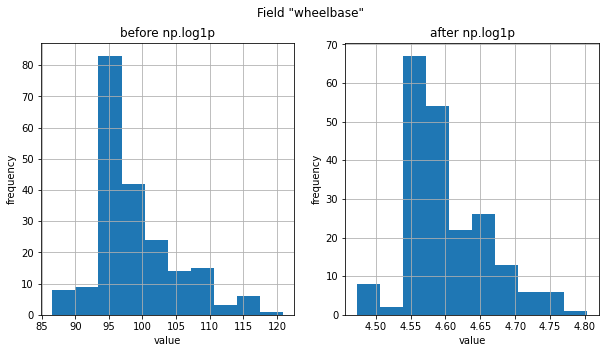

In [12]:



field = "wheelbase"

fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
data[field].hist(ax=ax_before)
data[field].apply(np.log1p).hist(ax=ax_after)

ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));




In [13]:
for col in skew_cols.index.values:
    if col == "price":
        continue
    data[col] = data[col].apply(np.log1p)

In [16]:
data.shape

(205, 191)

In [18]:
#data[cat_columns]

### Feature selection

#### Distribution of numerical features against price


Our target column in the dataset is the "Price" column. To find out the correlation of the price column with other factors and factors depends on the price, plotted the box plot of categorical factors with the price. The box plots are shown below:





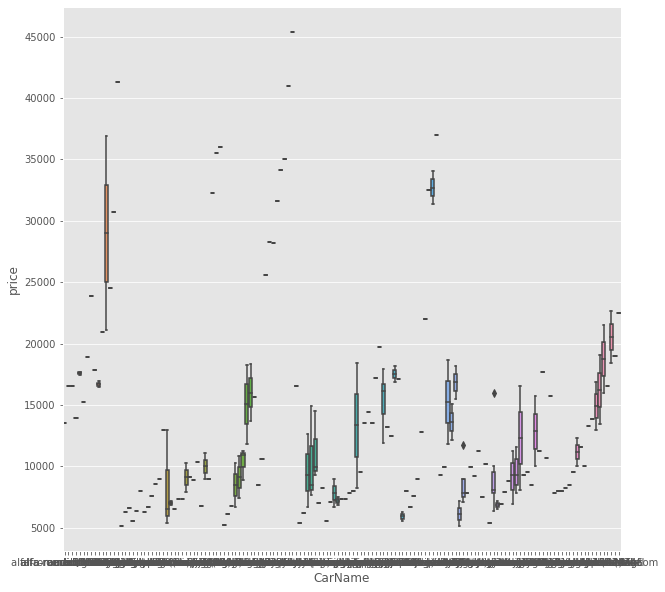

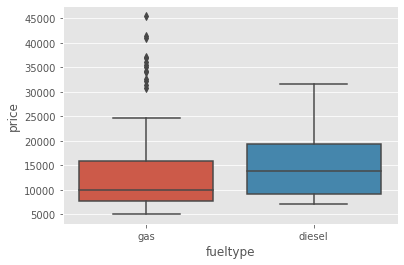

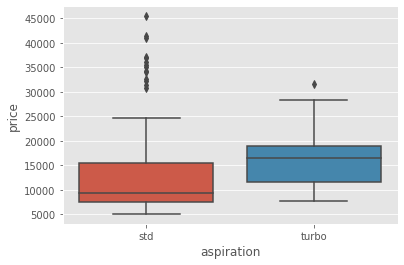

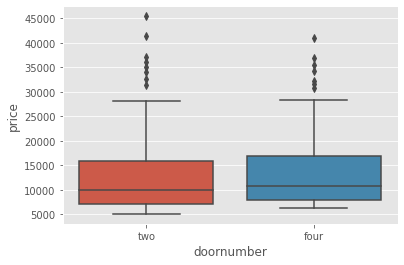

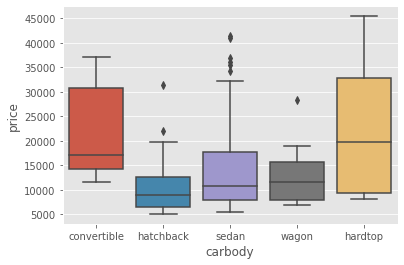

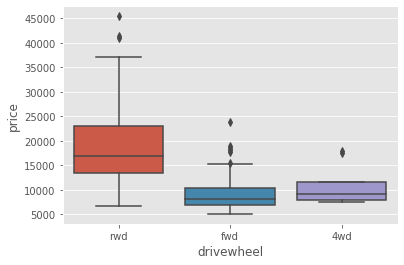

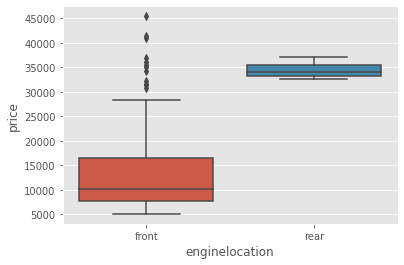

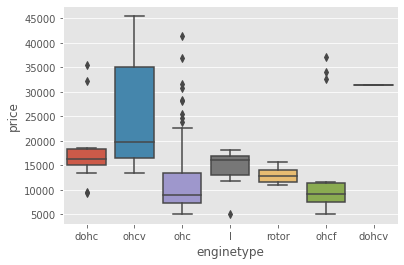

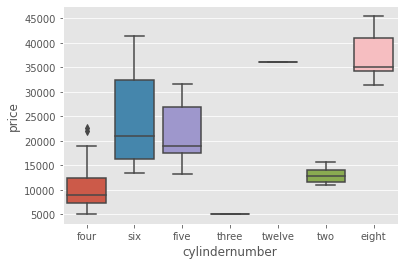

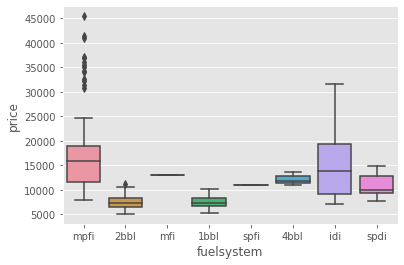

In [158]:
%matplotlib inline
plt.figure(figsize=(10,10))
for col in data[cat_columns].columns:    
            sns.boxplot(x=data[col], y=data['price'],data=data)
            plt.show()


From the above box plots, we can see that there is not much price difference when the door numbers are two or four. Therefore assuming a very low correlation we will drop the door number column. For the car name column, we can't see the labels but the plot is somewhat depicting a high correlation with price.

To visualize this better let's split the column and also rename the values in it. 

After renaming the car name the boxplot of car name and price looks like:





In [19]:
data.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       ...
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object', length=191)

In [21]:
#data.CarName

In [161]:
data['CarName']=data.CarName.str.split(" ",expand=True)[0]

In [162]:
data['CarName'] = data['CarName'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche'})

In [163]:
#data['CarName'].value_counts()

In [164]:
data['Company'] = data['CarName'].str.title()

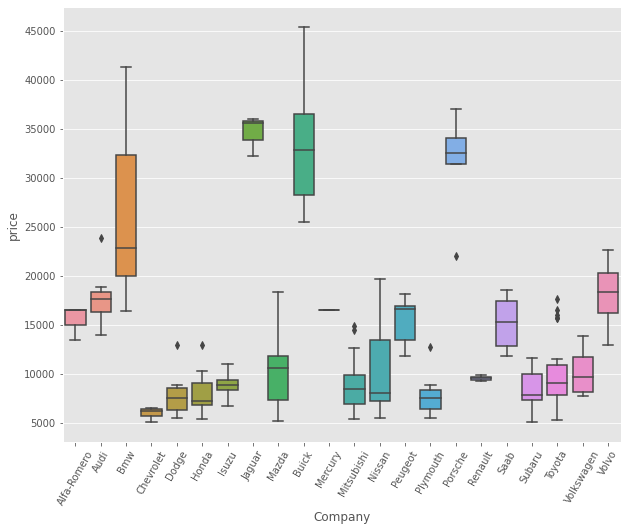

In [165]:
plt.figure(figsize=(10,8))
sns.boxplot(x=data['Company'],y=data['price'],data=data)
plt.xticks(rotation=60)
plt.show();


From the above visualizations, we can see how widely the prices vary from company to company. We therefore can use this feature to train our model and predict the price based on company names rather than using car names (models).


### Pearson correlation

To find out the overall correlation among all numerical variables, plotted the heatmap of the Pearson correlation and the heatmap diagram is shown below:

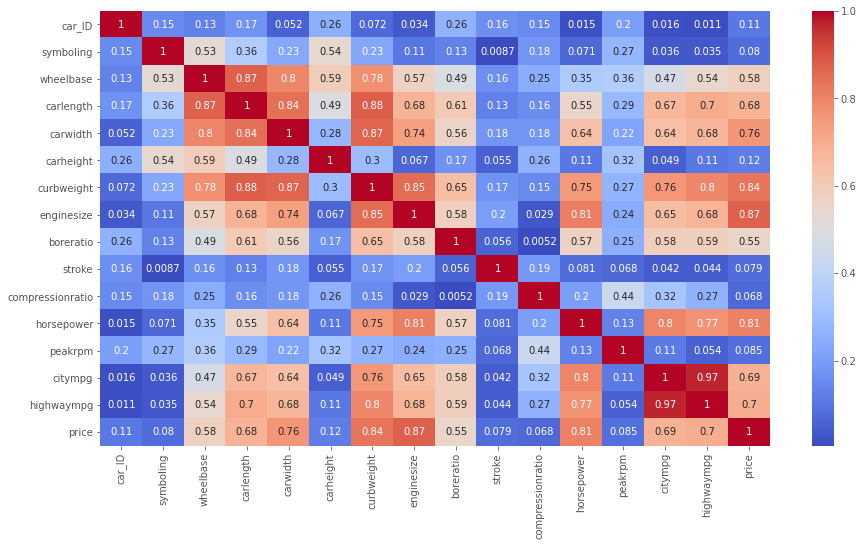

In [141]:
corr = data.corr()
corr

plt.figure(figsize=(15,8))
sns.heatmap(abs(corr), annot=True, cmap='coolwarm');

The correlation of factors with the price columns is:

In [105]:
print(corr.price.sort_values().to_markdown())

|                  |      price |
|:-----------------|-----------:|
| highwaympg       | -0.697599  |
| citympg          | -0.685751  |
| car_ID           | -0.109093  |
| peakrpm          | -0.0852672 |
| symboling        | -0.0799782 |
| compressionratio |  0.0505663 |
| stroke           |  0.0794431 |
| carheight        |  0.119336  |
| boreratio        |  0.553173  |
| wheelbase        |  0.568669  |
| carlength        |  0.68292   |
| carwidth         |  0.755968  |
| horsepower       |  0.808139  |
| curbweight       |  0.835305  |
| enginesize       |  0.874145  |
| price            |  1         |


From the correlation matrix we found out that car height, stroke, compression ratio, and peak rpm have no noticeable effect on the price of the cars therefore, we will drop these columns. car_ID column is also irrelevant for the prediction of the car price. From the box plot visualizations above we saw carNames and door number attribute can also be dropped.

In [106]:
data.drop(columns =['car_ID','carheight', 'stroke', 'compressionratio','peakrpm', 'CarName', 'doornumber'],inplace=True)

In [107]:
#data.shape

In [108]:
cat_columns = data.dtypes[data.dtypes== np.object]
cat_columns = cat_columns.index.tolist()
data = pd.get_dummies(data, columns= cat_columns, drop_first=True)
#data.shape

After feature selection, one-hot encoding for categorical values has been carried out.

Here we haven't removed the outliers. I think the outliers here may represent a real picture for eg the prices of some cars may in the real world be too high. Therefore I believe that removing outliers in the data set at hand would be not a wise thing to do.

## Data Modelling

In this section, we will try different models for predicting the car price and finds out which model is best suitable for the prediction of price.

Before splitting the data into train and test sets, the data set transformed into arrays. Then split data to train and test data with 80 and 20 percent respectively. After that, the standard scaling of the X data set has been carried out.

### Linear Regression

We start by applying the linear regression model to the data. The accuracy of the model has been measured through Mean Squared Error, Mean Absolute Error, Root Mean Squared Error, and $R^2$ values.



In [109]:
s = StandardScaler()

In [110]:
X = data.drop('price',axis=1)
Y = data.price
# First converting the Features into Dictionary
X = X.to_dict(orient='records')

#Importing vectorizer to convert Dictionary to array
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
X = vec.fit_transform(X).toarray()

#converting our target variable into array
Y = np.asarray(Y)

In [111]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=42)
X_train_s = s.fit_transform(xtrain)
X_test_s = s.fit_transform(xtest)

In [112]:
#print("xtrain shape : ", X_train_s.shape," :: xtest shape  : ", X_test_s.shape," :: ytrain shape : ", ytrain.shape," :: ytest shape  : ", ytest.shape) 

In [113]:
#X_train_s

In [114]:

lr = LinearRegression()


In [115]:
lr = LinearRegression()
las = Lasso()
rdg = Ridge()

In [116]:

lr.fit(X_train_s,ytrain)
lr_prediction=lr.predict(X_test_s)

The scatterd plot which visualize the relation between the actual values and predicted values is given below:

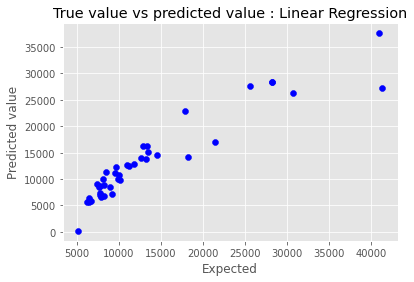

In [117]:
plt.style.use('ggplot')
plt.scatter(ytest, lr_prediction, c = 'blue') 
plt.xlabel("Expected") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 

The above plot shows approximately a straight line, but the accuracy of prediction would not be that good. The metrics of the predictions are:

In [118]:
from sklearn import metrics

print('\033[1mMean Squared Error is:\033[0m', metrics.mean_squared_error(ytest, lr_prediction))  
print('\033[1mMean Absolute Error is:\033[0m', metrics.mean_absolute_error(ytest, lr_prediction))  
print('\033[1mRoot Mean Squared Error is:\033[0m', np.sqrt(metrics.mean_squared_error(ytest, lr_prediction)))
from sklearn.metrics import r2_score
print('\033[1mThe R2 value is:\033[0m',r2_score(ytest,lr_prediction))

Mean Squared Error is: 9501168.015570093
Mean Absolute Error is: 1970.039894410287
Root Mean Squared Error is: 3082.396472806523
The R2 value is: 0.8796467685620716


### Ridge Regression

The second model we will be using is ridge regression. We used GridSearchCV for finding the best alpha parameter for the prediction.

In [119]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5);
ridge_regressor.fit(X_train_s,ytrain);


In [176]:
#print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
#print("\nUsing ",ridge_regressor.best_params_, " R2 score is: ", ridge_regressor.best_score_)

The best alpha value after the cross-validation is 5 for ridge regression with the best R2 score of 0.91.

The plot comparing actual and predicted values after the model prediction is shown below:

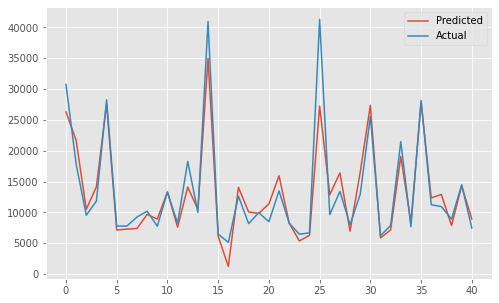

In [121]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_ridge)
plt.plot(ytest)
plt.legend(["Predicted","Actual"])
plt.show()

The metrics of the Redge regression is given below:

In [122]:
y_pred_ridge = ridge_regressor.predict(X_test_s)
print('\033[1mMean Squared Error is:\033[0m', metrics.mean_squared_error(ytest, y_pred_ridge))  
print('\033[1mMean Absolute Error is:\033[0m', metrics.mean_absolute_error(ytest, y_pred_ridge))  
print('\033[1mRoot Mean Squared Error is:\033[0m', np.sqrt(metrics.mean_squared_error(ytest, y_pred_ridge)))
print('\033[1mThe R2 value is:\033[0m',r2_score(ytest,y_pred_ridge))

Mean Squared Error is: 9468258.115130369
Mean Absolute Error is: 1945.7484939724832
Root Mean Squared Error is: 3077.053479406942
The R2 value is: 0.8800636449774482


From comparing the R2 value of the predictions, It can be seen that Ridge regression is slightly better than the basic linear regression. 

### Lasso Regression

After the ridge regression, the lasso regression has been carried out. Like the ridge, using GridSearchCV, the cross-validation for the alpha parameter has been carried out. The best alpha value was found to be 'alpha= 40' with an R2 score of 0.91.
The plot below shows the variation of predicted values from the actual values:

In [177]:
import warnings
warnings.filterwarnings('ignore')

lasso = Lasso(max_iter=100000)
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5);

lasso_regressor.fit(X_train_s,ytrain);



In [124]:
#print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
#print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [125]:
lasso_predict= lasso_regressor.predict(X_test_s)

In [126]:

print('\033[1mMean Squared Error is:\033[0m', metrics.mean_squared_error(ytest, lasso_predict))  
print('\033[1mMean Absolute Error is:\033[0m', metrics.mean_absolute_error(ytest, lasso_predict))  
print('\033[1mRoot Mean Squared Error is:\033[0m', np.sqrt(metrics.mean_squared_error(ytest, lasso_predict)))
print('\033[1mThe R2 value is:\033[0m',r2_score(ytest,lasso_predict))


Mean Squared Error is: 9339487.532622132
Mean Absolute Error is: 1952.2430540498651
Root Mean Squared Error is: 3056.057514612926
The R2 value is: 0.8816948081874465


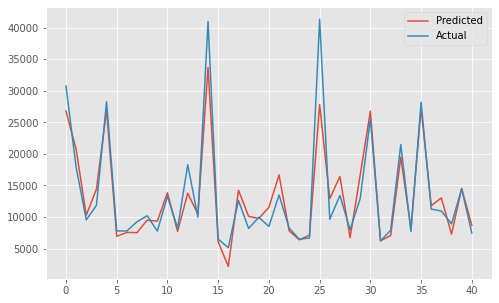

In [127]:
plt.figure(figsize=(8,5))
plt.plot(lasso_predict)
plt.plot(ytest)
plt.legend(["Predicted","Actual"])
plt.show()

By comparing the R2 values of the ridge regression and lasso, it seems that lasso is slightly better in predicting the price. Since lasso consumes much more time than the ridge because of the iteration, relatively ridge regression will be better.

### Elastic Net Regression

Apart from ridge and lasso, the Elastic net regression was also carried out and the metrics of the predictions have been calculated. The best alpha is '0.01'

The plot showing the relation for elastic net regression is shown below:

In [135]:
el_net = ElasticNet()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
el_regressor = GridSearchCV(el_net, parameters, scoring='r2', cv=5);
el_regressor.fit(X_train_s,ytrain);


In [175]:
#print("The best fit alpha value is found out to be :" ,el_regressor.best_params_)
#print("\nUsing ",el_regressor.best_params_, " R2: ", lasso_regressor.best_score_)

In [130]:
el_predict= el_regressor.predict(X_test_s)

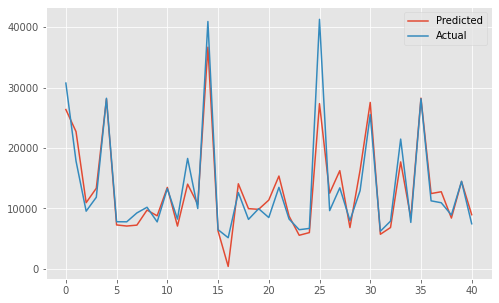

In [131]:
plt.figure(figsize=(8,5))
plt.plot(el_predict)
plt.plot(ytest)
plt.legend(["Predicted","Actual"])
plt.show()

The metrics of the prediction is:

In [132]:
print('\033[1mMean Squared Error is:\033[0m', metrics.mean_squared_error(ytest, el_predict))  
print('\033[1mMean Absolute Error is:\033[0m', metrics.mean_absolute_error(ytest, el_predict))  
print('\033[1mRoot Mean Squared Error is:\033[0m', np.sqrt(metrics.mean_squared_error(ytest, el_predict)))
print('\033[1mThe R2 value is:\033[0m',r2_score(ytest,el_predict))



Mean Squared Error is: 9369553.879408361
Mean Absolute Error is: 1955.9020316413844
Root Mean Squared Error is: 3060.972701513093
The R2 value is: 0.8813139516456691


### Model Evaluation

The summarised metrics of all the models is given below:


In [136]:
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    #accuracy     = accuracy_score(testing_y,predictions)
    mean_sq_err  = metrics.mean_squared_error(testing_y,predictions)
    mean_abs_err = metrics.mean_absolute_error(testing_y,predictions)
    Rmean_sq_err = np.sqrt(metrics.mean_squared_error(testing_y,predictions) )
    r2_score     = metrics.r2_score(testing_y,predictions)
    df = pd.DataFrame({"Model"                  : [name],
                       "Mean Square Error"      : [mean_sq_err],
                       "Mean Absolute Error"    : [mean_abs_err],
                       "Root Mean Square Error" : [Rmean_sq_err],
                       "R2 score" : [r2_score]
                       
                      })
    return df

model1 = model_report(lr,X_train_s,X_test_s,ytrain,ytest,
                      "Linear Regression")

model2 = model_report(ridge_regressor,X_train_s,X_test_s,ytrain,ytest,
                      "Ridge Regression")

model3 = model_report(lasso_regressor,X_train_s,X_test_s,ytrain,ytest,
                      "Lasso Regression")

model4 = model_report(el_regressor,X_train_s,X_test_s,ytrain,ytest,
                      "Elastic Net Regression")


model_performances = pd.concat([model1,model2,model3,model4],axis = 0).reset_index()
model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

In [174]:
model_performances

,Model,Mean Square Error,Mean Absolute Error,Root Mean Square Error,R2 score
0,Linear Regression,9.501168e+06,1970.039894,3082.396473,0.879647
1,Ridge Regression,9.468258e+06,1945.748494,3077.053479,0.880064
2,Lasso Regression,9.339488e+06,1952.243054,3056.057515,0.881695
3,Elastic Net Regression,9.369554e+06,1955.902032,3060.972702,0.881314


So from the table above, the Lasso regression has the best R2 score relatively. But for a large data set, this model consumes comparable much time than other models. So in that case I would prefer Ridge for predicting the Price of the car. The difference in the accuracy between ridge, lasso, and the elastic net is not that drastic.

## Conclusion

In this project, we tried to predict the car price for an automobile company. Figured out the factors which are affecting the price of a car. Then applied various regression models such as Linear, Ridge, Lasso, and elastic net.
From the careful examination of metrics of the different predicted models, concluded that the Ridge regression model performs relatively better in terms of accuracy and time taken for the prediction.

